<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt

Download the webpage at the url


In [3]:
#your code goes here
page = requests.get(url).text

Create a soup object


In [4]:
#your code goes here
soup = BeautifulSoup(page, "html.parser")

Scrape the `Language name` and `annual average salary`.


In [5]:
#your code goes here

# Let's look for the table element of the web page
table = soup.find('table')

language = []
annual = []

# Get all rows from the table
for row in table.find_all('tr'):
    # Get all columns in each row
    cols = row.find_all('td')
    
    # Get the columns 'Language name' and 'Annual Average Salary'
    language_name = cols[1].string
    annual_average_salary = cols[3].text
    #print("{} ---> {}".format(language_name, annual_average_salary))anguage = list
    
    # Transform the columns into lists
    language.append(language_name)
    annual.append(annual_average_salary)

language.pop(0)
annual.pop(0)

'Average Annual Salary'

Save the scrapped data into a file named *popular-languages.csv*


In [6]:
# your code goes here


# Let's create a dictionary with the values obtained
mydict = {"Language Name": language, "Annual Average Salary": annual}
mydict


# Let's covert the dictionary to a dataframe called pop_lang
pop_lang = pd.DataFrame(mydict)
pop_lang

# Convert the dataframe to csv file

#with open("C:/Users/Alejandro/Documents/IBM_Final_Project/popular-languages.csv", "w") as File1:
 #   for line in pop_lang:
  #      File1.write(line)



pop_lang.to_csv("popular-languages.csv", index = False)

In [22]:
# Open the file 'popular-languages.csv' and convert it to a dataframe

dataframe = pd.read_csv('popular-languages.csv')
dataframe.set_index('Language Name', inplace = True)
dataframe

,Annual Average Salary
Language Name,
Python,"$114,383"
Java,"$101,013"
R,"$92,037"
Javascript,"$110,981"
Swift,"$130,801"
C++,"$113,865"
C#,"$88,726"
PHP,"$84,727"
SQL,"$84,793"


## Authors


In [23]:
# We will convert column 'Annual Average Salary' to numero and remove the $ sign
dataframe[dataframe.columns[0]] = dataframe[dataframe.columns[0]].replace('[\$,]', '', regex=True).astype(float)
dataframe.sort_values(by = 'Annual Average Salary', ascending = False, inplace=True)
dataframe

,Annual Average Salary
Language Name,
Swift,130801.0
Python,114383.0
C++,113865.0
Javascript,110981.0
Java,101013.0
Go,94082.0
R,92037.0
C#,88726.0
SQL,84793.0


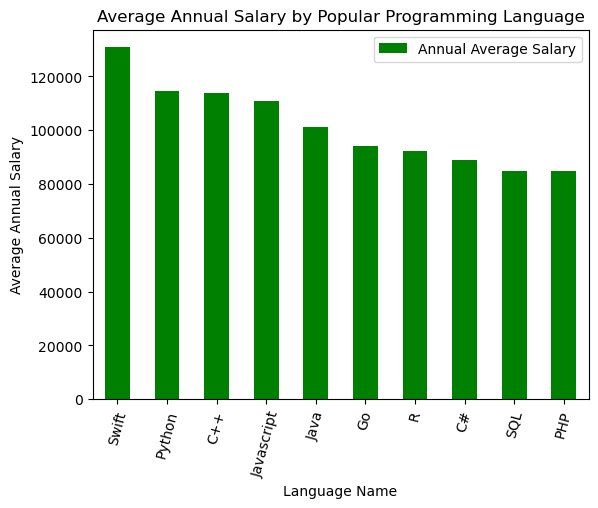

In [25]:
# Plot the bar chart
dataframe.plot(kind = 'bar', color = 'g')
plt.title('Average Annual Salary by Popular Programming Language')
plt.xlabel('Language Name')
plt.ylabel('Average Annual Salary')
plt.xticks(rotation = 75)
plt.show()

Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
